In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


In [2]:
from PIL import Image 
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [3]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(32,32)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/DeepLearning/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

133  images to be resized.
133  images resized.
가위 이미지 resize 완료!


In [4]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서

image_dir_path = os.getenv("HOME") + "/aiffel/DeepLearning/rock_scissor_paper/rock"
resize_images(image_dir_path)

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.

image_dir_path = os.getenv("HOME") + "/aiffel/DeepLearning/rock_scissor_paper/paper"
resize_images(image_dir_path)

107  images to be resized.
107  images resized.
118  images to be resized.
118  images resized.


In [5]:
import numpy as np

def load_data(img_path, number_of_data=363):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=32
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32
    ).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/DeepLearning/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 358 입니다.
x_train shape: (363, 32, 32, 3)
y_train shape: (363,)


라벨:  0


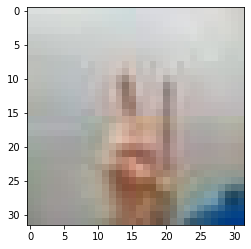

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [8]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt

# 아래의 하이퍼파라미터는 예시입니다. 높은 인식률을 얻기 위해 하이퍼파라미터를 수정해 보세요. 
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=20

model = keras.Sequential([
            Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
            BatchNormalization(),
            MaxPooling2D(2,2),
            Conv2D(64, (3,3), activation='relu'),
            BatchNormalization(),
            Dropout(0.2),
            MaxPooling2D(2,2),
            Flatten(),
            Dense(32, activation='relu'),
            Dropout(0.2),
            Dense(3, activation='softmax')  # Assuming you have 3 classes
        ])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

Epoch 1/20
11/11 [==============================] - 2s 100ms/step - loss: 1.0059 - accuracy: 0.6840 - val_loss: 1.3333 - val_accuracy: 0.0000e+00
Epoch 2/20
11/11 [==============================] - 1s 79ms/step - loss: 0.1832 - accuracy: 0.9325 - val_loss: 1.3624 - val_accuracy: 0.0000e+00
Epoch 3/20
11/11 [==============================] - 1s 76ms/step - loss: 0.0751 - accuracy: 0.9877 - val_loss: 1.3879 - val_accuracy: 0.0000e+00
Epoch 4/20
11/11 [==============================] - 1s 73ms/step - loss: 0.0613 - accuracy: 0.9755 - val_loss: 1.3422 - val_accuracy: 0.0000e+00
Epoch 5/20
11/11 [==============================] - 1s 71ms/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 1.2847 - val_accuracy: 0.0000e+00
Epoch 6/20
11/11 [==============================] - 1s 82ms/step - loss: 0.0223 - accuracy: 0.9969 - val_loss: 1.0129 - val_accuracy: 0.8649
Epoch 7/20
11/11 [==============================] - 1s 73ms/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 0.8953 - val_accuracy:

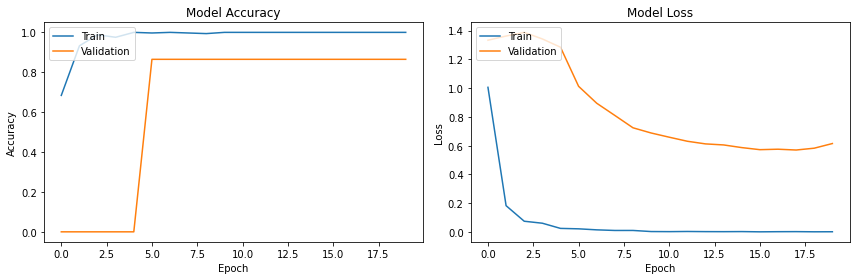

In [9]:
# model을 학습시키는 코드를 직접 작성해 보세요. 
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_norm, y_train, epochs=n_train_epoch, validation_split=0.1)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show();

In [10]:
image_dir_path = os.getenv("HOME") + "/aiffel/DeepLearning/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/DeepLearning/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/DeepLearning/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/DeepLearning/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

101  images to be resized.
101  images resized.
138  images to be resized.
138  images resized.
124  images to be resized.
124  images resized.
학습데이터(x_train)의 이미지 개수는 363 입니다.
x_test shape: (363, 32, 32, 3)
y_test shape: (363,)


In [11]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)

print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

12/12 - 0s - loss: 2.6952 - accuracy: 0.3416
test_loss: 2.6951656341552734 
test_accuracy: 0.3415977954864502


# 회고
- 픽셀이 너무 깨지는 게 아닌가? 32*32 로 바꾸기
- 육안으로도 구분이 안돼..
- 리사이즈 한 채로 돌리면 깨져서 다시 압축 푸는것부터 다시 하기
- dropout 추가, batch normalization 추가
- 로컬에서 계속 커널이 꺼져서 중간에 lms 로 옮겨갔다
- 왜 꺼지는지는 아직 잘 모르겠음
- GPT 가 Data Augmentation 도 추천해줬는데 아직 못해봤음
- 정확도가 0.34 인 것으로 보아 그냥 모든 걸 하나로 예측한게 아닌가 의심이 들지만 확인해보진 못했음